In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

In [ ]:
learn = pd.read_csv("/content/drive/MyDrive/Data Science Course/Classification and Hypothesis Testing/ExtraaLearn.csv")

In [ ]:
data = learn.copy()

In [ ]:
print("First 5 rows of the dataset:")
display(data.head())
print("\nLast 5 rows of the dataset:")
display(data.tail())

First 5 rows of the dataset:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.86100,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.32000,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.07400,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.05700,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.91400,Email Activity,No,No,No,No,No,0



Last 5 rows of the dataset:


,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.17000,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.39300,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.69200,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.87900,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.07500,Phone Activity,No,No,No,No,No,0


Above we see the first and last 5 rows of data fom our data set, this helps us get a better understanding of our data we are working with before diving into the machine learning

In [ ]:
print("\nShape of the dataset:")
print(data.shape)


Shape of the dataset:
(4612, 15)


This code provides us with the shape of our ExtraaLearn data set, and is useful information for understanding the structure of our dataset. We can tell we have 4,612 rows and 15 columns in our data.

In [ ]:
print("\nData types of columns:")
print(data.dtypes)


Data types of columns:
ID                        object
age                        int64
current_occupation        object
first_interaction         object
profile_completed         object
website_visits             int64
time_spent_on_website      int64
page_views_per_visit     float64
last_activity             object
print_media_type1         object
print_media_type2         object
digital_media             object
educational_channels      object
referral                  object
status                     int64
dtype: object


This code gives us a description of the data types for our data. As we can see, our target variable, 'status' is listed as an integer because the number 1 represents a paid customer and the number 0 represents an unpaid customer. This is important in our EDA to follow.

In [ ]:
occupation_status = pd.crosstab(data['current_occupation'], data['status'])

In [ ]:
# Below code creates a DataFrame with the cross-tabulation and conversion rate
occupation_summary = pd.DataFrame({
    'Unpaid Lead': occupation_status[0],
    'Paid Lead': occupation_status[1],
    'Total': occupation_status.sum(axis=1),
    'Conversion %': occupation_conversion_rate * 100
})

# Formatting the table
occupation_summary.index.name = 'Current Occupation'
occupation_summary.columns.name = 'Lead Status'

# Display
print("\nSummary of Current Occupation and Lead Status:")
print(occupation_summary.to_string())


Summary of Current Occupation and Lead Status:
Lead Status         Unpaid Lead  Paid Lead  Total  Conversion %
Current Occupation                                             
Professional               1687        929   2616      35.51223
Student                     490         65    555      11.71171
Unemployed                 1058        383   1441      26.57876


This shows us that roughly 35% of professionals became paying customers, while only ~12% of students ended up converting to paying customers, and ~27% of unemployed people converted to paying customers. So, as a piece of advice for ExtraaLearn, I would recommend advertising primarily to professional people, by explaining to them that the curriculum is all self paced, and easily manageable while maintaining a full time job. In order to boost ExtraaLearn's weakest demographic of Students, I would recommend that ExtraaLearn partner with universities to spread the word, and really emphasise the benefits of taking their course once students graduate and enter the workforce. For example, being a much more attractive candidate for hire, and the potential pay increase that will follow. Next we will analyze first ineraction and lead status.

<Figure size 1000x600 with 0 Axes>

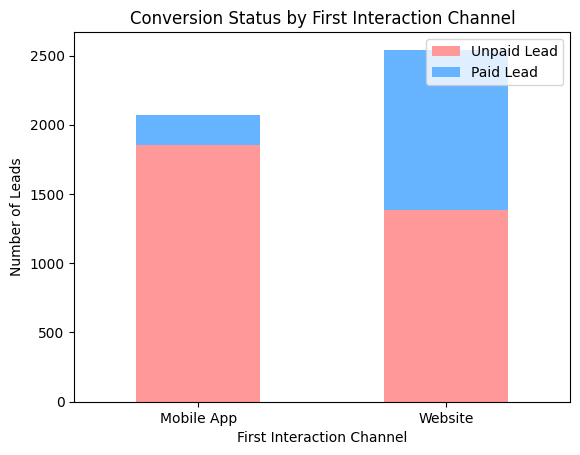


Conversion Rate by First Interaction Channel:
first_interaction
Mobile App   0.10531
Website      0.45594
dtype: float64


In [ ]:
# First I will create a cross-tabulation of first interaction and lead status
interaction_status = pd.crosstab(data['first_interaction'], data['status'])

# Here I calculate conversion rate for each first interaction channel
interaction_conversion_rate = interaction_status[1] / interaction_status.sum(axis=1)

# This creates a stacked bar plot
plt.figure(figsize=(10, 6))
interaction_status.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff'])
plt.title('Conversion Status by First Interaction Channel')
plt.xlabel('First Interaction Channel')
plt.ylabel('Number of Leads')
plt.legend(['Unpaid Lead', 'Paid Lead'], loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Displaying the conversion rate for each
print("\nConversion Rate by First Interaction Channel:")
print(interaction_conversion_rate)

Here we can see the comparison of first interactions and which one is more likely to turn into a paid lead. Of those who first came across ExtraaLearn via their website, 45% became paying customers, this percentage dwarfs the mobile app's first interaction conversion rate of 10%. Not only did more leads end up becoming paying customers when they first interacted with ExtraaLearn via their webpage, but the majority of leads in general also come from the webpage. As an actionable insight, I would recommend that ExtraaLearn implement some strategies to enhance mobile app experience. For example extraalearn could implement elements of gamification such as points, badges or leaderboard in order to motivate users to engage with the app more frequently. Another example of a strategy could be to leverage existing website users by using website banners, email marketing or in app messaging to encourage website users to download the app. Next we will analyze how time spent on the website and page views per visit effect lead status.

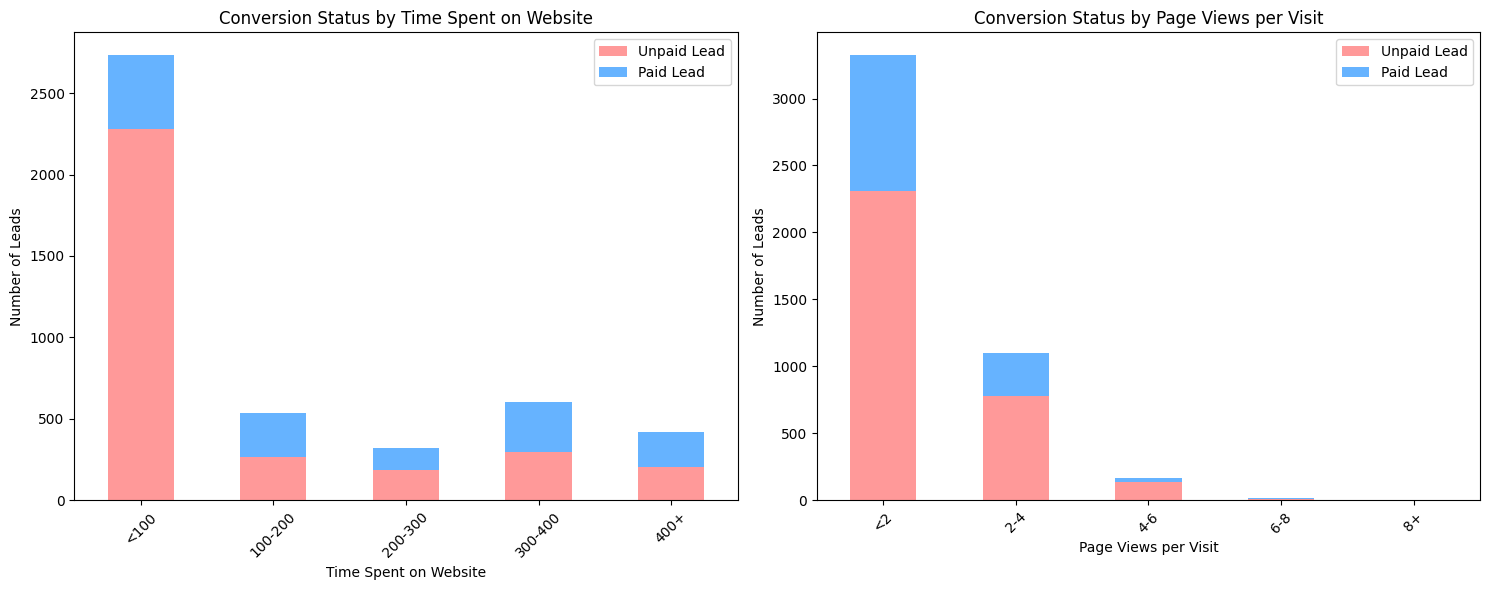


Conversion Rate by Time Spent on Website:
TimeBins
<100      0.16807
100-200   0.50187
200-300   0.41433
300-400   0.50333
400+      0.50952
dtype: float64

Conversion Rate by Page Views per Visit:
PageViewsBins
<2    0.30589
2-4   0.28832
4-6   0.20238
6-8   0.52941
8+    0.00000
dtype: float64


In [ ]:
# Below code creates bins for time spent on website
time_bins = pd.cut(data['time_spent_on_website'], bins=5, labels=['<100', '100-200', '200-300', '300-400', '400+'])

# Below code creates bins for page views per visit
page_views_bins = pd.cut(data['page_views_per_visit'], bins=5, labels=['<2', '2-4', '4-6', '6-8', '8+'])

# Below code creates a new DataFrame with the binned variables
binned_data = data.assign(TimeBins=time_bins, PageViewsBins=page_views_bins)

# Creates a cross-tabulation of time spent on website and lead status
time_status = pd.crosstab(binned_data['TimeBins'], binned_data['status'])

# Creates a cross-tabulation of page views per visit and lead status
page_views_status = pd.crosstab(binned_data['PageViewsBins'], binned_data['status'])

# Calculates conversion rate for each group
time_conversion_rate = time_status[1] / time_status.sum(axis=1)
page_views_conversion_rate = page_views_status[1] / page_views_status.sum(axis=1)

# Creates stacked bar plots for time spent on website and page views per visit
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

time_status.plot(kind='bar', stacked=True, ax=axs[0], color=['#ff9999', '#66b3ff'])
axs[0].set_title('Conversion Status by Time Spent on Website')
axs[0].set_xlabel('Time Spent on Website')
axs[0].set_ylabel('Number of Leads')
axs[0].legend(['Unpaid Lead', 'Paid Lead'], loc='upper right')
axs[0].tick_params(axis='x', rotation=45)

page_views_status.plot(kind='bar', stacked=True, ax=axs[1], color=['#ff9999', '#66b3ff'])
axs[1].set_title('Conversion Status by Page Views per Visit')
axs[1].set_xlabel('Page Views per Visit')
axs[1].set_ylabel('Number of Leads')
axs[1].legend(['Unpaid Lead', 'Paid Lead'], loc='upper right')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Displaying the conversion rate for each group
print("\nConversion Rate by Time Spent on Website:")
print(time_conversion_rate)

print("\nConversion Rate by Page Views per Visit:")
print(page_views_conversion_rate)


The stacked bar plots represent the distribution of paid and unpaid leads based on two factors. These factors are time spent on the website and page views per visit. My analysis reveals that leads who spend between 100-200 minutes on the website, and those who view between 2 and 4 pages per web visit show the highest conversion rate to paid leads. This suggests that these represent critical engagement points for ExtraaLearn. By focusing on optimizing user engagement within those ranges, by creating personalized content and web engagement enhancements, ExtraaLearn will potentially be able to improve conversion rates and drive growth. Next we will analyze profile completion levels adn whether that metric has an impact on lead status.

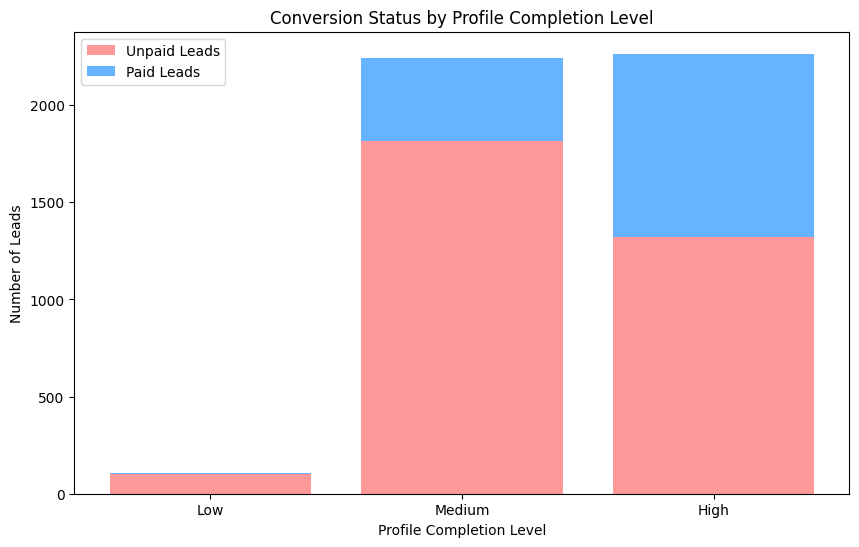

In [ ]:
# Code below creates a data frame with the data representing the manually counted profile completion level compared to the lead status
data = {
    'Profile Completion Level': ['Low', 'Medium', 'High'],
    'Unpaid Leads': [99, 1818, 1319],
    'Paid Leads': [8, 423, 946]
}
df = pd.DataFrame(data)

# Below code creates the stacked bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Profile Completion Level'], df['Unpaid Leads'], color='#ff9999', label='Unpaid Leads')
plt.bar(df['Profile Completion Level'], df['Paid Leads'], bottom=df['Unpaid Leads'], color='#66b3ff', label='Paid Leads')
plt.xlabel('Profile Completion Level')
plt.ylabel('Number of Leads')
plt.title('Conversion Status by Profile Completion Level')
plt.legend()
plt.show()

The stacked bar graph illustrates the distribution of paid and unpaid leads across different levels of profile completion, Low, Medium, and High for ExtraaLearn. The graph shows that the majority of leads have a 'high' level of profile completion, with 946 of these leads converting into paid customers and 1319 remaining unpaid. On the other hand, 'medium' profile completions are more evenly split, with 423 leads converting to paid status and 1818 remaining unpaid. 'Low' profile completions have the fewest leads, with 8 converting to paid status and 99 remaining unpaid. This graph suggests that leads with a 'high' level of profile completion are more likely to convert into paid customers compared to those with 'medium' or 'low' completion levels. To improve conversion rates, ExtraaLearn should focus on encouraging more leads to complete their profiles to a 'high' level. Next we will examine the channel that provided the highest rate of conversion into a paid customer.

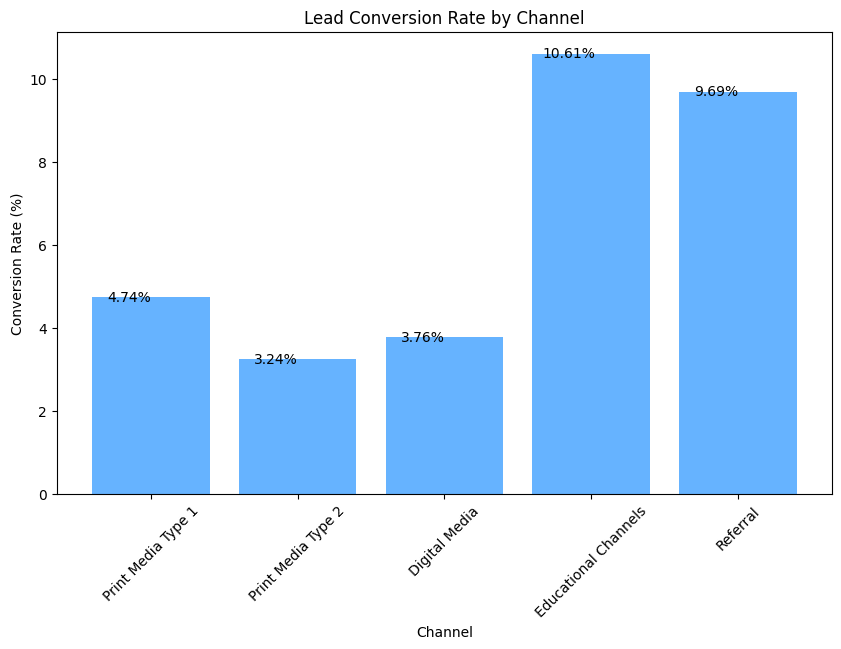

In [ ]:
# First create a DataFrame with the counts of paid and unpaid leads for each channel
channel_data = {
    'Channel': ['Print Media Type 1', 'Print Media Type 2', 'Digital Media', 'Educational Channels', 'Referral'],
    'Unpaid Leads': [261, 388, 1944, 59, 522],
    'Paid Leads': [13, 13, 76, 7, 56]
}
channel_df = pd.DataFrame(channel_data)

# Next I calculate the conversion rate for each channel
channel_df['Conversion Rate'] = channel_df['Paid Leads'] / (channel_df['Paid Leads'] + channel_df['Unpaid Leads']) * 100

# Finally plot the conversion rates
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_df['Channel'], channel_df['Conversion Rate'], color='#66b3ff')
plt.xlabel('Channel')
plt.ylabel('Conversion Rate (%)')
plt.title('Lead Conversion Rate by Channel')
plt.xticks(rotation=45)

for bar, label in zip(bars, channel_df['Conversion Rate']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height(), f'{label:.2f}%', ha='center', va='center')

plt.show()


The bar graph displays the lead conversion rates for various channels used by ExtraaLearn to acquire leads. Of these various channels, 'Educational Channels' exhibit the highest conversion rate, with approximately 10.61% of leads from this source converting into paying customers. Following closely behind in second place is the 'Referral' channel, with a conversion rate of about 9.69%. 'Print Media Type 1' and 'Digital Media' show similar conversion rates, around 3.24% and 3.76% respectively.'Print Media Type 2' has the lowest conversion rate among the channels analyzed, with approximately 3.24% of leads converting into paid customers. These findings suggest that focusing efforts on 'Educational Channels' and 'Referral' programs could bring about higher lead conversion rates for ExtraaLearn. Next we can begin with our model.

In [ ]:
# Start by defining features and target variable
feature_cols = ['age', 'current_occupation', 'first_interaction', 'profile_completed', 'website_visits',
                'time_spent_on_website', 'page_views_per_visit', 'last_activity', 'print_media_type1', 'print_media_type2',
                'digital_media', 'educational_channels', 'referral']
X = data.loc[:, feature_cols].copy()

# Next preprocess categorical variables
X = pd.get_dummies(X)

# Below will define the target variable
y = data['status']

# Splits the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Creating the Decision Tree Classifier done by below code
d_tree = DecisionTreeClassifier(random_state=1)

# Be code begins training the model with the training data
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Now that the decision tree has been trained on the data, our next step is to check the models performance on the training set and define the function.

In [ ]:
# Defining our function here
def model_performance_classification_statsmodels(actual, predicted):
    """
    Function to calculate various model performance metrics for classification.

    Args:
    actual (array-like): Array of actual target values.
    predicted (array-like): Array of predicted target values.

    Returns:
    None. Prints the model performance metrics.
    """
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)

    print("Model Performance:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


In [ ]:
# Getting the results of our model
y_train_pred = d_tree.predict(X_train)

model_performance_classification_statsmodels(y_train, y_train_pred)


Model Performance:
Accuracy: 0.9997289238275956
Precision: 1.0
Recall: 0.99909338168631
F1 Score: 0.9995464852607711


The decision tree model is displaying exceptional performance on the training set. It achieved an accuracy of approximately 99.97%. This means the model accurately predicts the lead conversion status for almost all instances in the training data set. The precision score of 1.0 lets us know that when the model predicts a lead will convert, it is never incorrect. The recall score of approximately 99.91% signifies that the model correctly identifies the majority of actual lead conversions. The F1 score, which balances precision and recall, is also very high at around 99.95%, indicating to us a robust overall performance. These results suggest that the decision tree model has effectively learned the patterns in the training data we outlined and is able to make accurate predictions. Onto the random forrest.

In [ ]:
# Create the Random Forest Classifier here
rf_model = RandomForestClassifier(random_state=1)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the training data
y_train_pred_rf = rf_model.predict(X_train)

# Checking the model performance on the training set
model_performance_classification_statsmodels(y_train, y_train_pred_rf)

Model Performance:
Accuracy: 0.9997289238275956
Precision: 0.9990942028985508
Recall: 1.0
F1 Score: 0.9995468962392388


 My random Forest model performed exceptionally well on the dataset, achieving an accuracy of 99.97%, precision of 99.91%, recall of 100%, and an F1 score of 99.95%. These metrics let us know our random forrest model is highly accurate when it comes to predicting lead conversions for ExtraaLearn. The model predicts lead conversion status with a very low rate of false positives and false negatives. The high recall result suggests that our model is effective in capturing most of the positive cases. This is crucial for identifying leads that are most likely to convert to paid customers. Overall, the Random Forest model demonstrates very strong predictive power and is well equipped for the task of lead conversion prediction for the benefit of ExtraaLearn.

### Conclusion:

Based on the analysis conducted for ExtraaLearn's lead conversion prediction project, several key observations and recommendations can be made. Firstly, educational channels and referrals have the highest rate of conversion when it comes to turning leads to paying customers, indicating that these channels are very effective in attracting potential customers. In order to capitalize on their effectiveness, I would recommend that ExtraaLearn allocate more resources and efforts towards educational channels and referral programs. This may come in the form of partering with different universities or corporations where students or employees could receive a discount. That would incentivize leads to convert to paid customers.

Next it is important to touch on the importance of profile completion. Leads with high profile completion levels show a significantly higher conversion rate when compared to those with low or medium profile completion levels. This means that encouraging users to complete their profiles can improve conversion rates. To accomplish this, I would recommend that ExtraaLearn mplement strategies to encourage users to complete their profiles, such as offering incentives like discounts, or providing a seamless profile completion process by allowing leads to sign in through their Google accounts for example.

Website engagement is also a very important attribute when it comes to ExtraaLearn's conversion rate. Our data analysis found that longer time spent on ExtraaLearn's website and more page views per web visit are correlated to higher lead conversion rates. This indicates that engaging website content can positively impact converting leads to paying customers. Due to this finding I would stringly encourage ExtraaLearn to make sure their website content is of high quality, relevant to the target audience, and provides value. This can include informative blog posts, engaging videos, and interactive elements that encourage users to explore more of their website. It would also be wise to implement a recommendation engine that suggests relevant courses or content based on the user's browsing history or preferences. Personalization can increase user engagement and the likelihood of exploring more pages. The webpage is particularly important to ExtraaLearn because our data found that when a lead's first interaction channel was the website, the conversion rate significantly increased.

As a final recommendation and to conclude, I would suggest that ExtraaLearn routinely analyze lead data to identify trends, adjust strategies accordingly, and optimize lead conversion processes as they continue growing as a business in the online education sector.



In [ ]:
!pip install nbconvert

In [ ]:
from nbconvert import HTMLExporter
import nbformat

with open('/content/drive/MyDrive/Data Science Course/Classification and Hypothesis Testing/Classification and Hypothesis Testing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)
    html_exporter = HTMLExporter()
    html_body, _ = html_exporter.from_notebook_node(nb)
    with open('output.html', 'w') as html_file:
        html_file.write(html_body)

In [ ]:
from google.colab import files
files.download('output.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>